# Hyperparameter Finetuning

In [591]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import linear_model

In [592]:
df_train = pd.read_csv (r'C:\Users\elira\DataScience\projects\project_DB_recruit_restaurant_visitor_forecasting\Final\test_dev_train\train_data.csv')
df_train.describe()

,max_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,27059.000000,27059.000000,27059.000000,27059.000000,27059.000000
mean,35.033002,20.649248,6.507077,289.326509,144.707417
std,22.058590,12.636614,3.597102,355.811326,177.932968
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,11.000000,6.000000,128.000000,65.000000
50%,31.000000,18.000000,6.000000,224.000000,112.000000
75%,47.000000,28.000000,7.000000,368.000000,184.000000
max,675.000000,174.000000,97.000000,23338.000000,11669.000000


In [593]:
X_train = df_train.drop(['sum_visitors'],axis=1).values
y_train = df_train['sum_visitors']          

In [594]:
df_dev = pd.read_csv (r'C:\Users\elira\DataScience\projects\project_DB_recruit_restaurant_visitor_forecasting\Final\test_dev_train\dev_data.csv')
df_dev.describe()

,max_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,6765.000000,6765.000000,6765.000000,6765.000000,6765.000000
mean,34.927864,20.622025,6.473171,285.881301,143.000296
std,23.898578,13.621198,3.374303,318.276669,159.146025
min,1.000000,1.000000,1.000000,2.000000,1.000000
25%,19.000000,11.000000,6.000000,128.000000,64.000000
50%,31.000000,18.000000,6.000000,224.000000,112.000000
75%,47.000000,28.000000,7.000000,366.000000,183.000000
max,877.000000,372.000000,77.000000,8258.000000,4129.000000


In [595]:
X_dev = df_test.drop(['sum_visitors'],axis=1).values
y_dev = df_test['sum_visitors']  

## Grid search

In [596]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_absolute_error',n_jobs=1,refit=True,cv=10)

In [597]:
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [598]:
abs(search.best_score_)

4.2658042372660985

In [599]:
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
second_model=(mean_absolute_error(y_true=y_dev, y_pred=elastic.predict(X_dev)))
print(second_model)

4.582809265018951


In [600]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'MSLE': metrics.mean_squared_log_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [601]:
## example = test the model
y = [2,4,6,8,10]
y_hat = [2,3,4,5,30]

In [602]:
regressionMetrics(y, y_hat)

{'MSE': 82.8,
 'RMSE': 9.09945053286186,
 'MAE': 5.2,
 'MSLE': 0.28017901106191967,
 'RMSLE': 0.5293193847403661}

In [603]:
models_list = pd.DataFrame()

# Elastic Net_dev_before

In [604]:
mod1 = ElasticNet(alpha=1.0, l1_ratio=0.5)
mod1.fit(X_dev,y_dev)

ElasticNet()

In [605]:
pred1 = mod1.predict(X_dev)
model_dict = {'model': "Elastic-Net-dev-before"}
models_list = models_list.append({**model_dict, **regressionMetrics(y_dev, pred1)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.154085,4.011442,0.000713,2.002859,0.026698,Elastic-Net-dev-before


# Elastic Net_dev_after

In [606]:
mod2 = ElasticNet(alpha=0.00001, l1_ratio=0.8)
mod2.fit(X_dev,y_dev)

ElasticNet(alpha=1e-05, l1_ratio=0.8)

In [607]:
pred2 = mod.predict(X_dev)
model_dict = {'model': "Elastic-Net-dev-after"}
models_list = models_list.append({**model_dict, **regressionMetrics(y_dev, pred2)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.154085,4.011442,0.000713,2.002859,0.026698,Elastic-Net-dev-before
1,0.120211,4.024652,0.000712,2.006153,0.026689,Elastic-Net-dev-after


In [608]:
df_test = pd.read_csv (r'C:\Users\elira\DataScience\projects\project_DB_recruit_restaurant_visitor_forecasting\Final\test_dev_train\test_data.csv')
df_test.describe()

,max_visitors,avg_visitors,count_visitors,weekend_visitors,sum_visitors
count,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000
mean,34.803595,20.546766,6.492137,287.964172,144.036538
std,24.084217,12.728748,3.867326,369.325448,184.653175
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,11.000000,6.000000,128.000000,64.000000
50%,31.000000,18.000000,6.000000,220.000000,110.000000
75%,46.000000,28.000000,7.000000,364.000000,182.000000
max,777.000000,131.000000,99.000000,10482.000000,5241.000000


In [609]:
X_test = df_test.drop(['sum_visitors'],axis=1).values
y_test = df_test['sum_visitors']

In [610]:
mod3 = ElasticNet(alpha=0.00001, l1_ratio=0.8)
mod3.fit(X_test,y_test)

ElasticNet(alpha=1e-05, l1_ratio=0.8)

In [611]:
pred3 = mod.predict(X_test)
model_dict = {'model': "Elastic-Net-test"}
models_list = models_list.append({**model_dict, **regressionMetrics(y_test, pred3)}, ignore_index=True)
models_list

,MAE,MSE,MSLE,RMSE,RMSLE,model
0,0.154085,4.011442,0.000713,2.002859,0.026698,Elastic-Net-dev-before
1,0.120211,4.024652,0.000712,2.006153,0.026689,Elastic-Net-dev-after
2,0.120211,4.024652,0.000712,2.006153,0.026689,Elastic-Net-test


# Final

In [612]:
models_list.sort_values('MAE')

,MAE,MSE,MSLE,RMSE,RMSLE,model
1,0.120211,4.024652,0.000712,2.006153,0.026689,Elastic-Net-dev-after
2,0.120211,4.024652,0.000712,2.006153,0.026689,Elastic-Net-test
0,0.154085,4.011442,0.000713,2.002859,0.026698,Elastic-Net-dev-before


<AxesSubplot:xlabel='sum_visitors'>

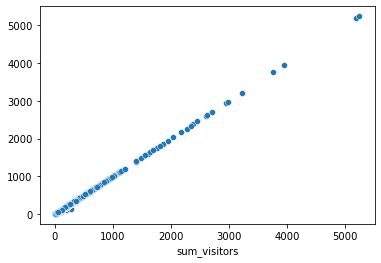

In [613]:
sns.scatterplot(y_test, pred3)